In [1]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


## Спецификация 
- 'churn' - *факт оттока в текущем месяце (целевая переменная)*
- 'gender' - пол
- 'near_location' - проживание или работа в районе, где находится фитнес-центр
- 'partner' - сотрудник компании-партёра клуба
- 'promo_friends' - факт первоначальной записи в рамках акции "приведи друга"
- 'phone' - наличие контактного телефона
- 'age' - возраст
- 'lifetime' - время с первого обращения в фитнесс-центр
- 'contract_period' - длительность текущего действующего аобнемента (месяц, 3 месяца, 6 месяцев, 1 год)
- 'month_to_end_contract' - срок до окончания текущего действующего абонемента (в месяцах)
- 'group_visits' - факт посещения групповых занятий
- 'avg_class_frequency_total' - средняя частота посещений в неделю за все время с начала действия абонемента
- 'avg_class_frequency_current_month' - средняя частота посещений в неделю за предыдущий месяц
- 'avg_additional_charges_total' - суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

## Предварительный анализ 
### Загрузим необходимые библиотеки 

In [22]:
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.svm import NuSVR
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('gym.csv')

### Изучим полученные данные

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         4000 non-null   int64  
 1   gender                             4000 non-null   int64  
 2   Near_Location                      4000 non-null   int64  
 3   Partner                            4000 non-null   int64  
 4   Promo_friends                      4000 non-null   int64  
 5   Phone                              4000 non-null   int64  
 6   Contract_period                    4000 non-null   int64  
 7   Group_visits                       4000 non-null   int64  
 8   Age                                4000 non-null   int64  
 9   Avg_additional_charges_total       4000 non-null   float64
 10  Month_to_end_contract              4000 non-null   float64
 11  Lifetime                           4000 non-null   int64

In [25]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [26]:
#1. Модель бэггинга - случайный лес (Random Forest):

from sklearn.ensemble import RandomForestClassifier

# Создаем модель случайного леса с 100 деревьями
rf_model = RandomForestClassifier(n_estimators=100)

# Обучаем модель на тренировочных данных
rf_model.fit(X_train, y_train)

# Оцениваем качество модели на тестовых данных
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

#2. Модель бустинга - градиентный бустинг (Gradient Boosting):

from sklearn.ensemble import GradientBoostingClassifier

# Создаем модель градиентного бустинга с 100 деревьями и скоростью обучения 0.1
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Обучаем модель на тренировочных данных
gb_model.fit(X_train, y_train)

# Оцениваем качество модели на тестовых данных
accuracy = gb_model.score(X_test, y_test)
print("Accuracy:", accuracy)


#3. Модель стекинга - мета-классификатор на основе логистической регрессии:


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

# Обучаем базовые модели на тренировочных данных
rf_preds = cross_val_predict(rf_model, X_train, y_train, cv=5, method='predict_proba')
gb_preds = cross_val_predict(gb_model, X_train, y_train, cv=5, method='predict_proba')

# Создаем мета-классификатор на основе логистической регрессии
meta_model = LogisticRegression()

# Обучаем мета-классификатор на прогнозах базовых моделей
meta_model.fit(np.hstack([rf_preds, gb_preds]), y_train)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_test_preds = rf_model.predict_proba(X_test)
gb_model.fit(X_train, y_train)
gb_test_preds = gb_model.predict_proba(X_test)

# Оцениваем качество модели на тестовых данных

meta_test_preds = meta_model.predict_proba(np.hstack([rf_test_preds, gb_test_preds]))
accuracy = meta_model.score(np.hstack([rf_test_preds, gb_test_preds]), y_test)
print("Accuracy:", accuracy)


Accuracy: 0.91
Accuracy: 0.92875
Accuracy: 0.9275


Accuracy of Bagging Classifier: 92.88%
Accuracy of Random Forest Classifier: 90.62%


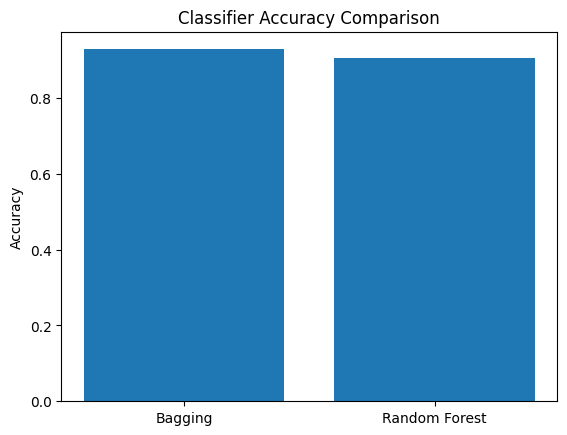

In [27]:

# Создаем три модели: решающее дерево, бэггинг и случайный лес

bg = gb_model
rf = rf_model

# Обучаем модели на обучающей выборке

bg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Получаем предсказания на тестовой выборке

bg_pred = bg.predict(X_test)
rf_pred = rf.predict(X_test)

# Вычисляем точность предсказания каждой модели

bg_acc = accuracy_score(y_test, bg_pred)
rf_acc = accuracy_score(y_test, rf_pred)

# Выводим точность каждой модели на экран

print("Accuracy of Bagging Classifier: {:.2f}%".format(bg_acc*100))
print("Accuracy of Random Forest Classifier: {:.2f}%".format(rf_acc*100))

# Создаем график точности предсказания каждой модели
models = [ 'Bagging', 'Random Forest']
accuracies = [ bg_acc, rf_acc]
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()
